In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

In [2]:
def display_img(img):
    fig = plt.figure(figsize=(10,12))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='gray')

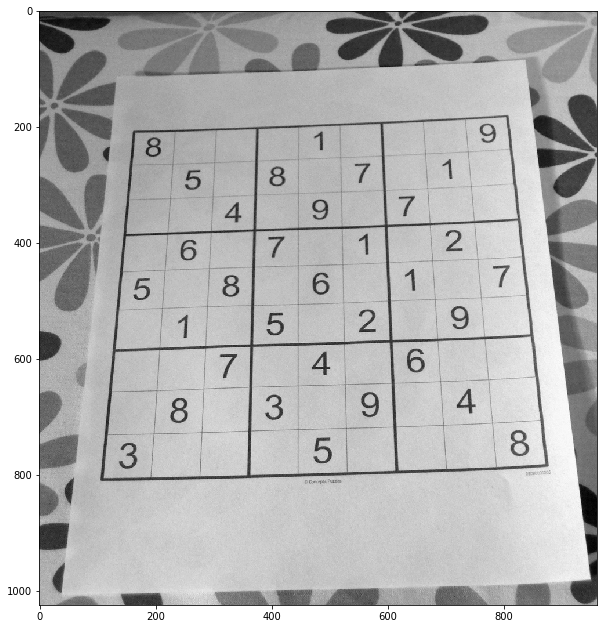

In [3]:
# read the image in grayscale
sudoku = cv.imread('DATA/sudoku.jpg',0)
display_img(sudoku)

<h3> Using Sobel gradients for edge detection </h3>

In [4]:
# Here we use custom depth (max depth)
# here we use dx as 1 and dy as 0 (gradient in x)
sobelx = cv.Sobel(sudoku, cv.CV_64F, 1, 0, ksize=5)

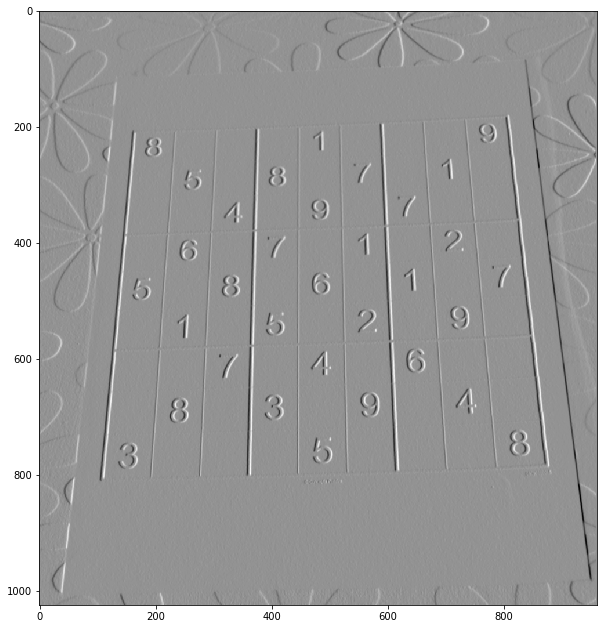

In [5]:
display_img(sobelx)

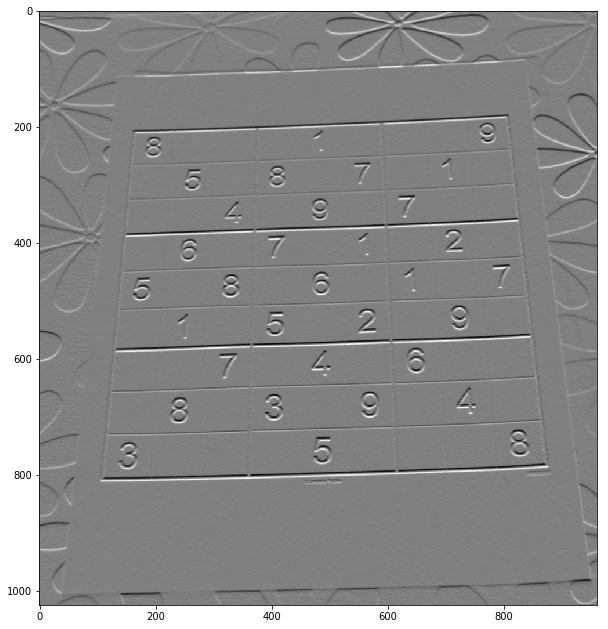

In [10]:
# here we use dx as 0 and dy as 1 (gradient in y)
sobely = cv.Sobel(sudoku, cv.CV_64F, 0, 1, ksize=5)
display_img(sobely)

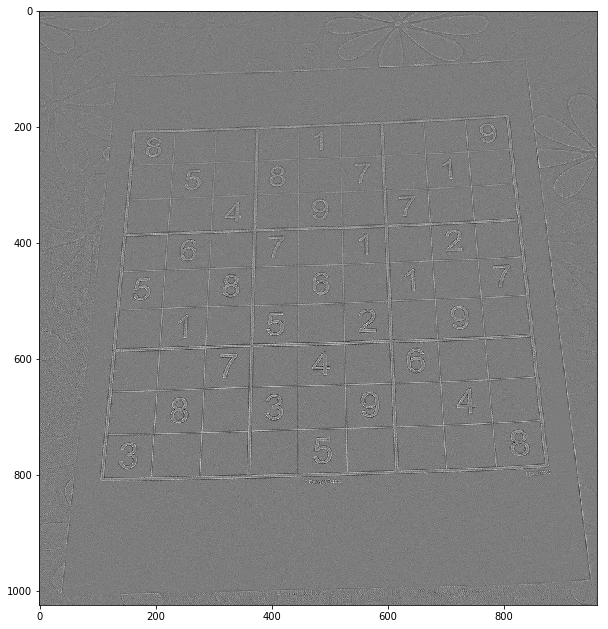

In [14]:
laplacian = cv.Laplacian(sudoku, cv.CV_64F)
display_img(laplacian)

<h3>Now we can apply preciously used techniques</h3>

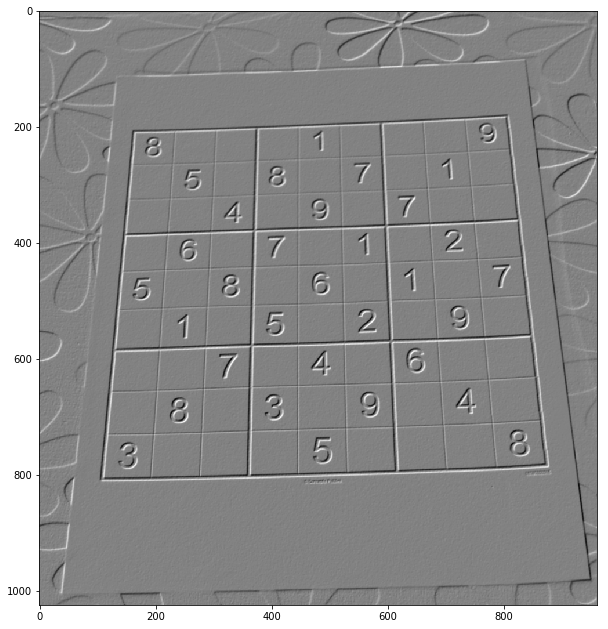

In [51]:
blended = cv.addWeighted(sobelx,0.5,sobely,0.5,0)
display_img(blended)

In [90]:
level, threshed = cv.threshold(blended, 120, 255, cv.THRESH_TOZERO_INV)

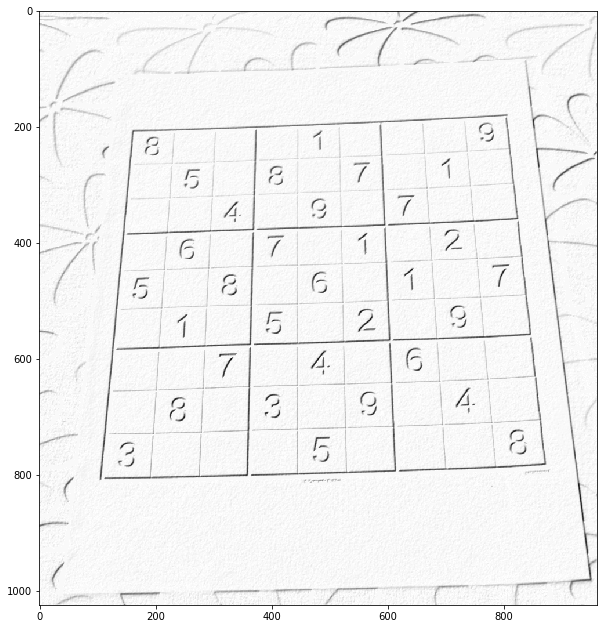

In [91]:
display_img(threshed)

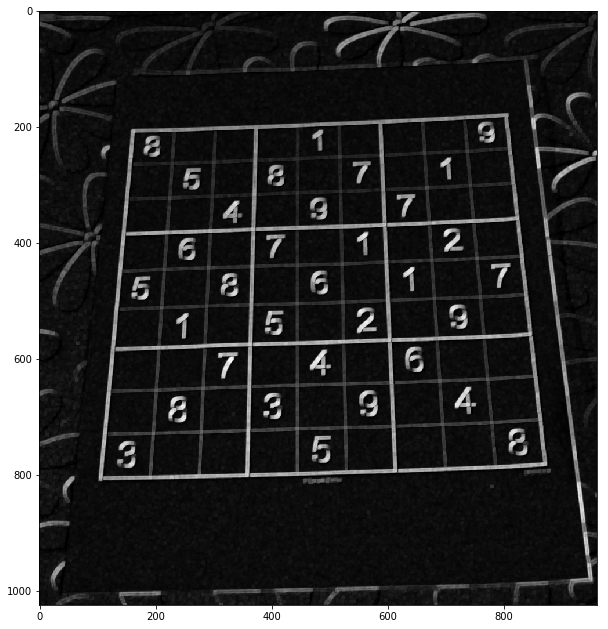

In [97]:
kernel = np.ones((5,5), np.uint8)
morphed = cv.morphologyEx(threshed, cv.MORPH_GRADIENT, kernel)
display_img(morphed)

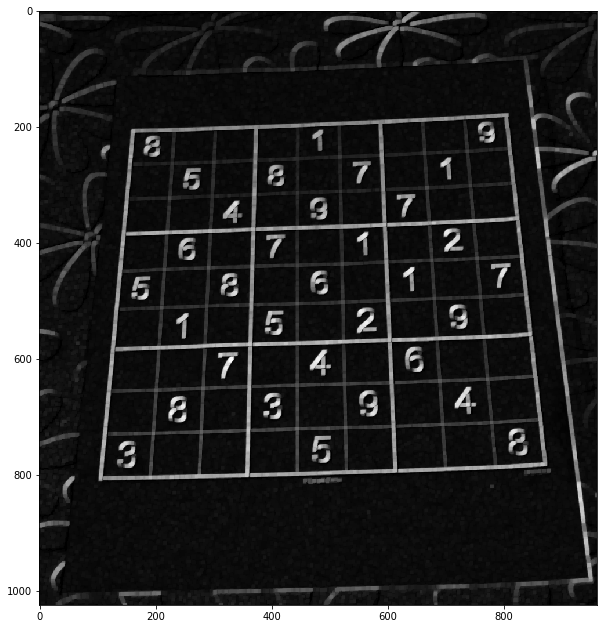

In [98]:
morphed = cv.morphologyEx(morphed, cv.MORPH_OPEN, kernel)
display_img(morphed)